In [4]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Importing the data

In [90]:
data= pd.read_csv('../Dauphine 272/Data_stocks_US.csv',sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])

In [91]:
data.head()

,BEst EPS,BEst EBITDA,BEst DPS,BEst Div Yld,BEst P/Bk,Last Price,10-year Yield
dates,,,,,,,
1999-12-31,55.56,NaN,NaN,NaN,NaN,1469.25,6.442
2000-01-31,57.33,NaN,NaN,NaN,NaN,1394.46,6.665
2000-02-29,57.93,NaN,NaN,NaN,NaN,1366.42,6.409
2000-03-31,58.09,NaN,NaN,NaN,NaN,1498.58,6.004
2000-04-28,58.27,NaN,NaN,NaN,NaN,1452.43,6.212


# Charting the data

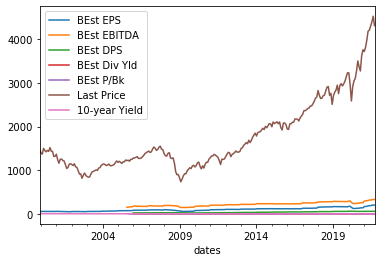

In [92]:
data.plot()

## Computing the dividend yield

$ d_t=\frac{D_t}{P_t}$

In [93]:
div_yield=data["BEst DPS"]/data["Last Price"]

Text(0.5, 1.0, 'Financial Valuation')

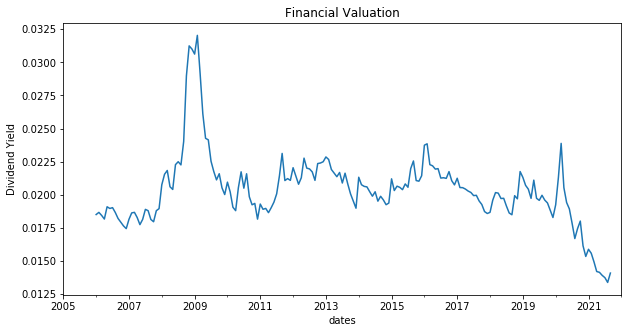

In [94]:
fig, axe = plt.subplots(figsize=(10,5))
div_yield.plot(ax=axe)
axe.set_ylabel('Dividend Yield')
date_start=datetime.date(2005,1,1)
date_end=datetime.date(2022,1,1)
axe.set_xlim([date_start,date_end])
plt.title("Financial Valuation")

In [95]:
earnings_yield=data["BEst EPS"]/data["Last Price"]

Text(0.5, 1.0, 'Financial Valuation')

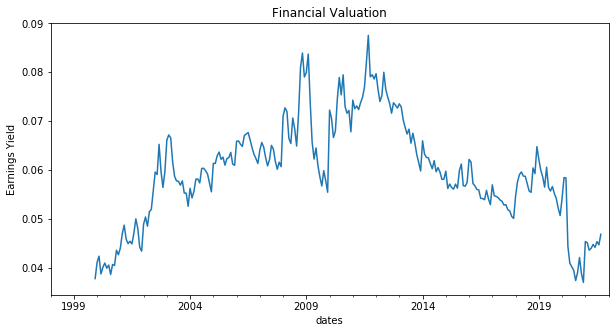

In [96]:
fig, axe = plt.subplots(figsize=(10,5))
earnings_yield.plot(ax=axe)
axe.set_ylabel('Earnings Yield')
date_start=datetime.date(1998,1,1)
date_end=datetime.date(2022,1,1)
axe.set_xlim([date_start,date_end])
plt.title("Financial Valuation")

Text(0.5, 1.0, 'Financial Valuation')

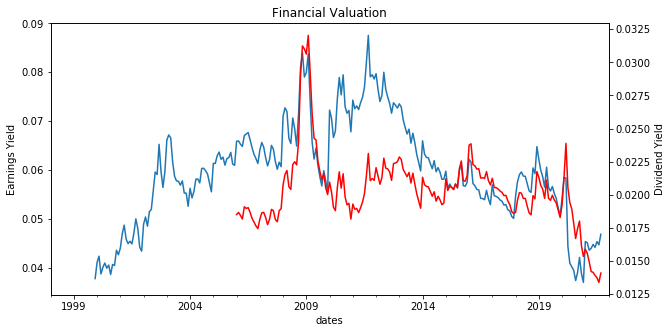

In [97]:
fig, axe = plt.subplots(figsize=(10,5))
earnings_yield.plot(ax=axe)
axe2=axe.twinx()
div_yield.plot(ax=axe2,color='red')
axe.set_ylabel('Earnings Yield')
axe2.set_ylabel('Dividend Yield')
date_start=datetime.date(1998,1,1)
date_end=datetime.date(2022,1,1)
axe.set_xlim([date_start,date_end])
plt.title("Financial Valuation")

Text(0.5, 1.0, 'Financial Valuation')

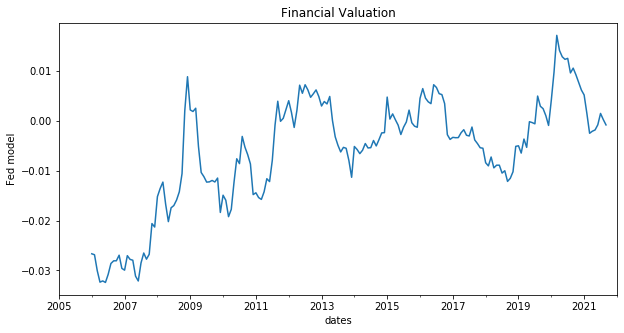

In [100]:
fig, axe = plt.subplots(figsize=(10,5))

axe.set_ylabel('Fed model')

fed_model=div_yield-data["10-year Yield"]/100

fed_model.plot()

date_start=datetime.date(2005,1,1)
date_end=datetime.date(2022,1,1)
axe.set_xlim([date_start,date_end])
plt.title("Financial Valuation")

# Rates

In [103]:
data= pd.read_csv('../Dauphine 272/Rates.csv',sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])

In [105]:
data.head()

,USGG10YR Index,USGG5YR Index
dates,,
1999-12-31,6.442,6.344
2000-01-31,6.665,6.683
2000-02-29,6.409,6.595
2000-03-31,6.004,6.314
2000-04-28,6.212,6.538


In [110]:
carry=data["USGG10YR Index"]/100

In [118]:
Roll_down=((data["USGG10YR Index"]-data["USGG5YR Index"])/100)/5*(8)

In [119]:
Total_carry=pd.concat([carry,carry+Roll_down],axis=1)
Total_carry.columns=['Carry','Carry + Rolldown']

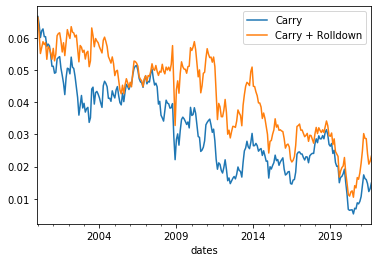

In [120]:
Total_carry.plot()

In [33]:
list_files=['Data_stocks_CH.csv','Data_stocks_US.csv','Data_stocks_EM.csv','Data_stocks_EU.csv']
list_asset=['SMI','S&P500','MSCI EM','Eurostoxx']

In [74]:
for i in range(0,len(list_files)):
    data= pd.read_csv(list_files[i],sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])
    carry=data["BEst EPS"]/data["Last Price"]
    returns=np.log(data["Last Price"]).diff(12)
    data_correl=pd.concat([returns.shift(-12),carry],axis=1).corr()
    if i==0:
        output=pd.DataFrame([data_correl.iloc[1,0]])
    else:
        temp=pd.DataFrame([data_correl.iloc[1,0]])        
        output=pd.concat([output,temp])
        
print(output)

          0
0  0.145311
0  0.285665
0  0.296760
0 -0.011898


In [117]:
for i in range(0,len(list_files)):
    data= pd.read_csv(list_files[i],sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])
    carry=data["BEst EPS"]/data["Last Price"]
    if i==0:
        output=carry
    else:
        output=pd.concat([output,carry],axis=1)

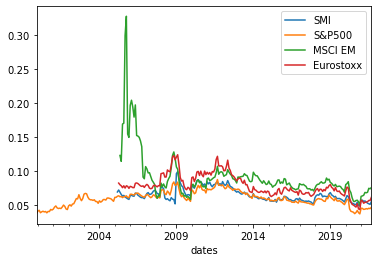

In [118]:
output.columns=['SMI','S&P500','MSCI EM','Eurostoxx']
output.plot()
plt.savefig('output_equities_commodities.pdf')

In [99]:
data= pd.read_csv('commodities.csv',sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])
carry=pd.concat([data.iloc[:,0]/data.iloc[:,1]-1,data.iloc[:,2]/data.iloc[:,3]-1,data.iloc[:,4]/data.iloc[:,5]-1],axis=1)
returns=np.log(data.iloc[:,[0,2,4]]).diff(12).shift(-12)
for i in range(0,3):
    temp=pd.concat([carry.iloc[:,i],returns.iloc[:,i]],axis=1).corr()
    if i==0:
        output_commo=pd.DataFrame([temp.iloc[1,0]])
    else:
        output_commo=pd.concat([output_commo,pd.DataFrame([temp.iloc[1,0]])])


In [100]:
output_commo

,0
0,-0.335882
0,0.248670
0,-0.250363


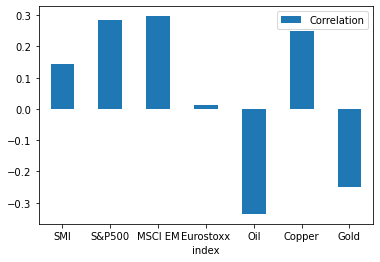

In [106]:
df = pd.DataFrame({'index':['SMI','S&P500','MSCI EM','Eurostoxx','Oil','Copper','Gold'], 'Correlation':[0.145311,0.285665,0.296760,0.011898,-0.3358820,0.248670,-0.250363]})
ax = df.plot.bar(x='index', y='Correlation', rot=0)
plt.savefig('output_correlation.pdf')

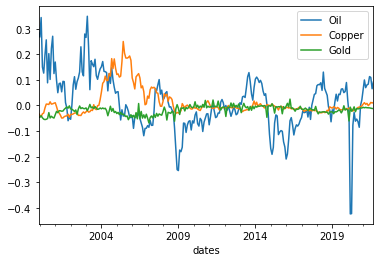

In [114]:
carry.columns=['Oil','Copper','Gold']
carry.plot()
plt.savefig('output_carry_commodities.pdf')